<a href="https://colab.research.google.com/github/Rakshithatr04/20221COM0105/blob/main/labsheet7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# plot utilities

In [44]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
  plt.figure(figsize=(10,6))
  plt.plot(time[start:end],series[start:end],format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
             plt.legend(fontsize=14,labels=label)
  plt.grid(True)
  plt.show()


# Trend

In [45]:
def trend(tie,slope=0):
  series=slope*time
  return series


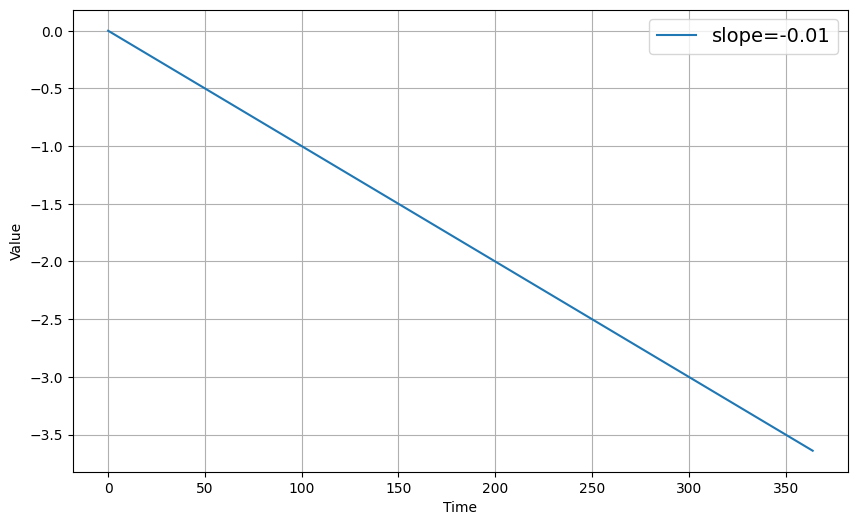

In [46]:
time=np.arange(365)
slope=-0.01
series=trend(time,slope)
plot_series(time,series,label=[f'slope={slope}'])

##seasonality

In [47]:
def seasonal_pattern(season_time):
  data_pattern=np.where(season_time<0.4,np.cos(season_time*2*np.pi),1/np.exp(3*season_time))
  return data_pattern



In [48]:
def seasonality(time,period,amplitude=1,phase=0):
  season_time=((time+phase)%period)/period
  data_pattern=amplitude*seasonal_pattern(season_time)
  return data_pattern

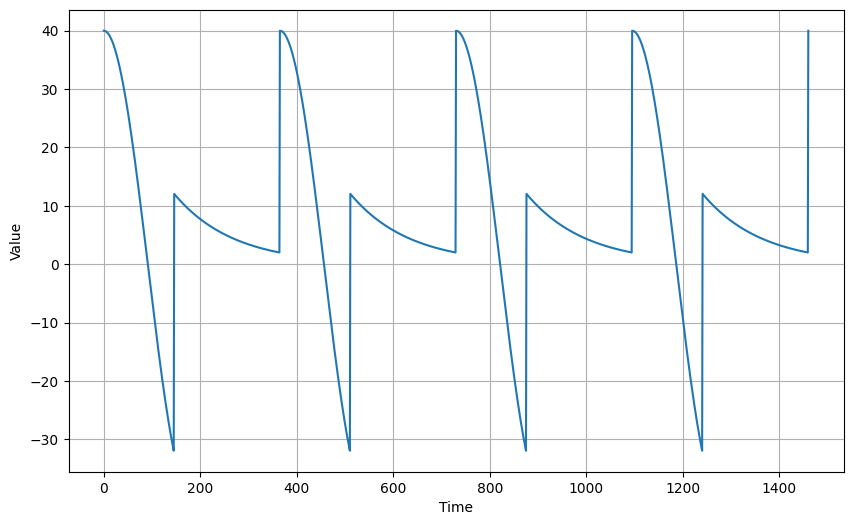

In [49]:
time=np.arange(4*365+1)
period=365
amplitude=40
series=seasonality(time,period=period,amplitude=amplitude)
plot_series(time,series)

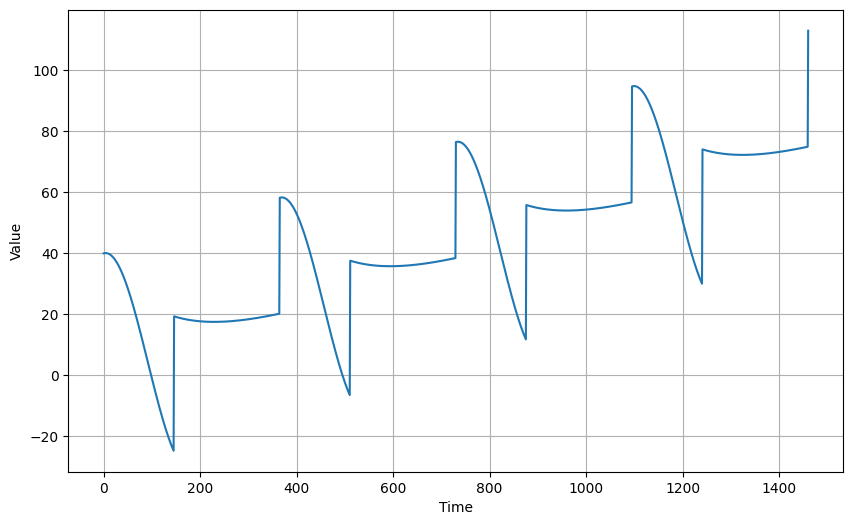

In [50]:
slope=0.05
period=365
amplitude=40
series=trend(time,slope)+seasonality(time,period=period,amplitude=amplitude)
plot_series(time,series)

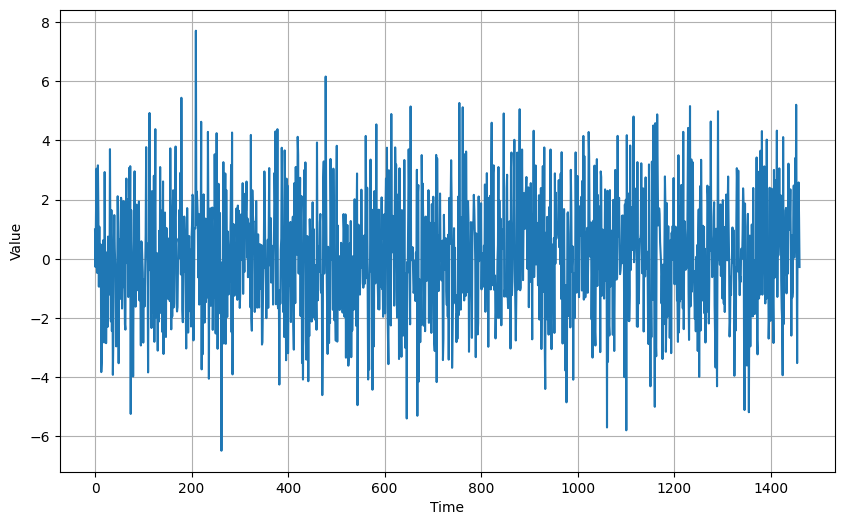

In [51]:
noise_level=2
noise_signal=noise(time,noise_level=noise_level,seed=42)
plot_series(time,noise_signal)

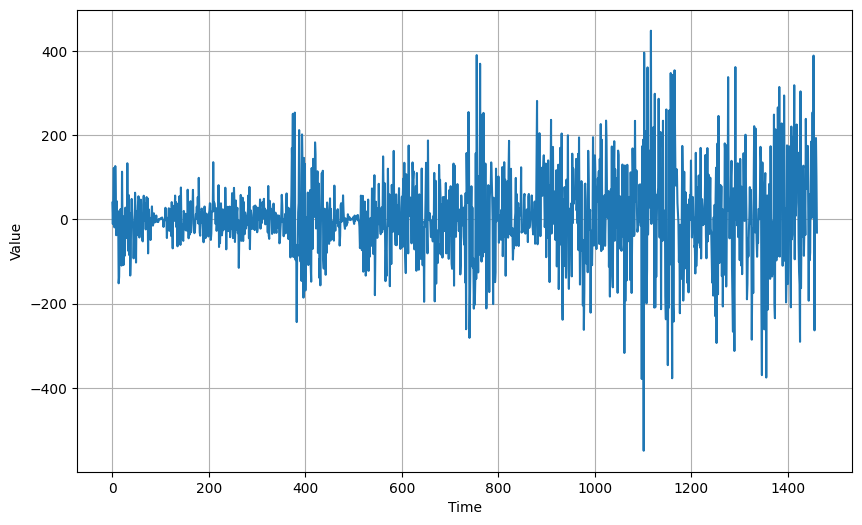

In [52]:
series*=noise_signal
plot_series(time,series)

##autocorrelation

In [53]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  sr = rnd.randn(len(time) + 50)
  ar = np.zeros(len(time) + 50)
  ar[:50] = 100
  phi1 = 0.5
  phi2 = -0.1
  for step in range(50, len(time) + 50):
    ar[step] += phi1 * ar[step - 50]
    ar[step] += phi2 * ar[step - 33]
  ar = ar[50:] * amplitude
  return ar

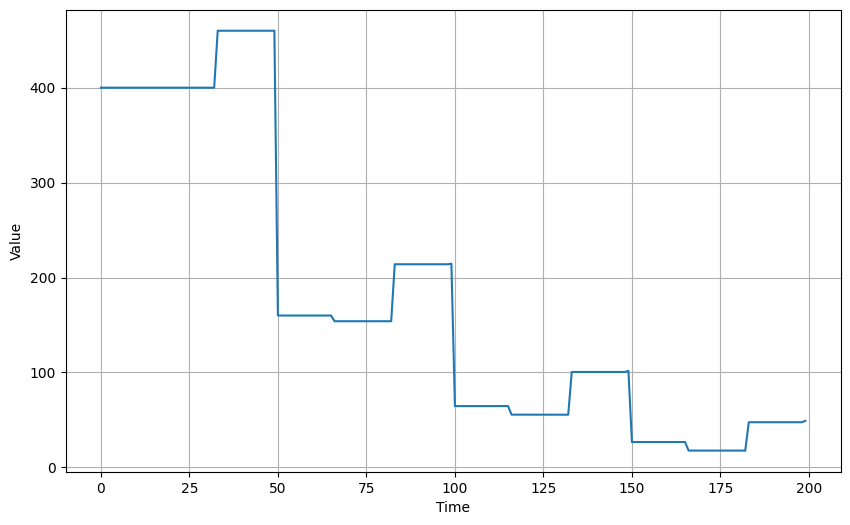

In [54]:
series=autocorrelation(time,amplitude=10,seed=42)
plot_series(time[:200],series[:200])

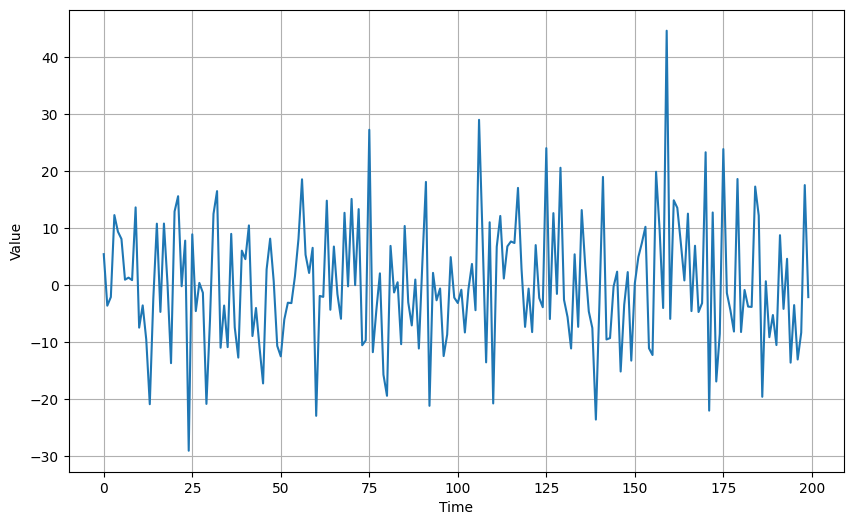

In [60]:
def autocorrelation(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    ar = rnd.randn(len(time) + 50)
    phi1 = 0.5
    phi2 = -0.1
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    ar = ar[50:] * amplitude
    return ar

def autocorrelation2(time, amplitude, seed=None):
    rnd = np.random.RandomState(seed)
    ar = rnd.randn(len(time) + 1)
    phi = 0.8
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    ar = ar[1:] * amplitude
    return ar

series = autocorrelation(time, amplitude=10, seed=42)
plot_series(time[:200], series[:200])

